# A visual and text analysis of metabolomics data 

## Introduction

In 2015 I discovered a gene from a patient with cardiovascular disease named *CALHM2*. This gene encodes the protein Calcium Homeostasis Modulator Protein 2 (CALHM2). Little is known about CALHM2. A 2019 study published in Nature [1] has shown that Calhm2 is a voltage-gated ion channel with a role in taste sensation and neuronal toxicity. However, very little is known about the role of CALHM2 outside the brain, particularly in the heart. My research thus far has discovered that when the Calhm2 gene is removed in cells, mitochondria become dysfunctional, as shown by premature opening of the mitochondrial permeability transition pore (cell death channel) and importantly lipid levels are changed that are integral to cell structure and function ultimately leading to changes in cell size (Figure 1) which causes cell death.

![](cell_shape.png)
***Figure.1*** - *Wildtype and CALHM2 KO cells stained with phalloidin to show the plasma membrane (green) and mitochondria (grey). Note the abnormal increase in cell shape in CALHM2 KO cells, which could result from abnormal cytokinesis or an alteration in cellular lipid levels that are essential for structural integrity of the cell*.



I hypothesise that, in CALHM2 depleted cells, mitochondria become abnormal, which are key sites of lipid biogenesis and metabolism, leading to abnormal cellular lipids levels essential for maintaining cell shape, thereby perturbing the structural integrity of the cell [2-4]. My research so far has shown CALHM2 is present in the mitochondria, the mitochondria are abnormal and cellular lipid levels are altered. Since, numerous lipid species exist, it would be important to identify which individual lipids are altered after CALHM2 depletion.

I performed a lipidomics (a technique to study the entire lipid content of the cell) analysis on wildtype and CALHM2 knockout (KO) cells to identify which lipids are changed in CALHM2 KO cells (compared with wildtype) and potentially cause cell death, which could ultimately lead to certain pathologies such as cardiovascular disease [5]. The lipidomics data needed to be processed before analysis, which I did in coursework 1. For example, missing values were removed, statistical tests were performed, lipids that were only downregulated in CALHM2 KO cells were selected, and the data were processed to be ready for graphical analysis. This project aims to identify the most significantly changed lipids in CALHM2 depleted cells compared with wildtype cells that have the most physiological relevance. Once that lipid is identified, I will use a combination of natural language processing and web scraping to explore the function of that lipid and a possible role as to why a change in the level of that particular lipid may cause heart disease. The aims are split into three:

(i) Visually analyse the lipidomics data to identify trends and patterns in the data to identify the lipids that are most differentially changed compared with wildtpye cells.


(ii) Web scrape the PubMed website to find articles on the lipid most changed in the dataset and perform some natural language processing techniques to identify keywords in the text, which may give an idea into the function of that lipid.


(iii) Perform a document similarity analysis of web scraped text of published articles from that particularly lipid and compare them with articles on specific diseases such as cancer, neurodegeneration, and cardiovascular disease to determine which disease the lipid most closely associates with.


In aim 1, I will present that data visually by using a combination of matplotlib and the seaborn package to allow the generation of a swarm plot and a violin plot, which will help identify trends in the data. Some data will first need to be processed to allow visual representation. For example, the data will need to be normalised, and p-values will log-transformed. In addition, I can group the lipid species together, such as ceramides and sphingomyelin, to determine if a particular lipid species are significantly downregulated in CALHM2 depleted cells. This analysis will help identify which lipids levels are most significantly changed compared with the wildtype cells and importantly allow for the identification of the lipid that is most significantly changed in the dataset. Finally, in aim 1, I will scrape the human metabolome database website to obtain a description and a name for that lipid, because at present the lipids are currently identified by a number, which makes it unclear as to the true identity of that lipid. In aim 2, I will extract more information about the particular lipid. I will perform a PubMed search of that lipid, but only select review articles as this will give more information about the general function of this lipid. From this PubMed search, I will retrieve 10 published articles on this lipid by scraping the title and the abstract of each manuscript in the PubMed search. As this analysis can be error prone I will perform exception handling to handle the errors. For example, perhaps only 9 abstracts are scraped instead of 10, so I will write a function to handle potential errors. In addition, unit testing will be performed on the function used to web scrape to test if the function is fit to use and indeed returns the abstracts, the links and the title.

Once the abstracts have been scraped, the text can be processed to do some analysis via Natural Language Processing. I will produce Wordclouds of the cleaned text that have been either lemmatized or stemmed. This analysis will allow me to identify the keywords such as subcellular compartments or specific diseases from the abstracts as well as compare stemming with lemmatisation to determine which method is best for pre-processing the text for creating wordclouds. In addition, I will generate tf-idf scores from the scrapped abstracts to determine which words are important in the text over a range of abstracts scraped (corpus). This analysis might identify some key words such as specific diseases or key compartments in the cells that overall might give an indication as to the function of this lipid. For example, mitochondria may appear in the word cloud or have a high tf-idf score. In aim 3, the objective is to compare text similarity from a PubMed search of several diseases, including cardiovascular disease, cancer, mitochondrial disease and neurodegeneration, with the abstracts previously generated from the lipid most significantly changed in the dataset. This analysis will help identify what disease this lipid is most associated with. In addition, I will compare two methods used to compute similarities in the text, cosine distance and Euclidean distance, to determine which method is best for this analysis. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance_matrix
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import nltk
from collections import Counter
import re
import matplotlib as mpl
import copy
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer as ps 
from nltk.tokenize import word_tokenize
import nltk.stem as stemmer
import nltk
import string
from nltk.corpus import stopwords
from nltk import download
import requests
from bs4 import BeautifulSoup
from pandas import DataFrame
from nltk.tokenize import sent_tokenize, word_tokenize
import sys
from PIL import Image
from sklearn.feature_extraction.text import TfidfTransformer
from matplotlib.ticker import StrMethodFormatter
import os
import glob

## Here I load the data that I processed and filtered in coursework part 1 and print the last 2 columns of the dataframe

In [2]:
df = pd.read_pickle('CW1.pkl')
df.tail(2)

,XCMS ID,name in HMDB,HMDB ID,Mean_wildtype,Mean_CALHM2 KO,t-statistic,p-value
590,1062,Cer(d18:1/26:0);Cer(d18:0/26:1(17Z)),HMDB04955;HMDB11772,31683.484035,21201.336232,3.404614,0.019155
217,1791,Cer(d18:1/23:0),HMDB00950,157783.563247,102899.193209,2.882742,0.034478


## I sort the data by the size of the p-value so the values are sorted from the lowest p-value (most significant) to the highest p-value

In [3]:
df.sort_values('p-value').head(5)

,XCMS ID,name in HMDB,HMDB ID,Mean_wildtype,Mean_CALHM2 KO,t-statistic,p-value
302,483,MG(18:0e/0:0/0:0),HMDB11143,516134.387025,290978.746508,8.531572,0.000364
491,80,DG(16:1n7/0:0/22:6n3);DG(20:3n6/0:0/18:4n3);DG...,HMDB56176;HMDB56327;HMDB56368;HMDB07539;HMDB07...,44116.272057,19711.197077,8.073063,0.000472
482,28,DG(24:0/18:0/0:0);Ceramide (d18:1/24:0);DG(22:...,HMDB07796;HMDB04956;HMDB07600;HMDB07376;HMDB56...,272830.890575,135597.594662,8.012544,0.000489
408,1179,"TG(14:1(9Z)/o-18:0/22:2(13Z,16Z));TG(18:0/o-18...",HMDB48404;HMDB45471;HMDB53688;HMDB44360;HMDB45...,1645834.636,986482.0497,7.162194,0.000825
549,211,DG(24:0/14:0/0:0);CE(18:0);DG(16:0/0:0/22:0);D...,HMDB07791;HMDB10368;HMDB56012;HMDB07361;HMDB07...,881100.4226,305199.27003,7.134439,0.000840


In [4]:
#check how many values the dataframe contains
len(df.index)

242

## Since the data frame contains 242 lipids, I will filter the non-relevant lipids that are not linked to heart disease. Another way that I could have filtered the data is by setting a p-value threshold. However, in this instance, the highest p-value is 0.004493, which indicates a high level of significance. I have written code to filter out the data based on the level of the p-value for future users of this code who might have non-significant values. Here I am going to remove DG, TG, PE and PC lipids. DG is a Diacylglycerol and functions as a second messenger [6] in the cell. The change in cell shape in CALHM2 KO cells cannot account for an increase in a second messenger. The data suggest a structural lipid is altered, that is, a lipid that is integral for the shape of the cell. Accordingly, TG's, which are triacylglycerols, are needed for energy production [7] and do not contribute to the cell shape. In addition, PE and PCs (Phosphatidylethanolamine and phosphatidylcholine) are highly implicated in neurodegeneration, liver disease and virulence of certain pathogenic organisms [8] but not cardiovascular disease. Therefore I have excluded these 4 lipid species from the subsequent analysis.

In [5]:
#df.loc[df['p-value'] < 0.005].head(2)

In [6]:
mask = df['name in HMDB'].str.contains('DG|TG|PE|PC')

df_filter = df.loc[~(mask)].copy(deep=True)

len(df_filter.index)

42

## Now I have filtered the data to remove certain lipid species. I am going to visualise the filtered data. First of all I want to examine the distrubtion of p-values (generated in coursework 1) in the data by plotting a histogram of the p-values.

## The resultant graph shows most of the data are on the left side of the histogram with fewer values are on the right. Therefore, the data are skewed to the right.


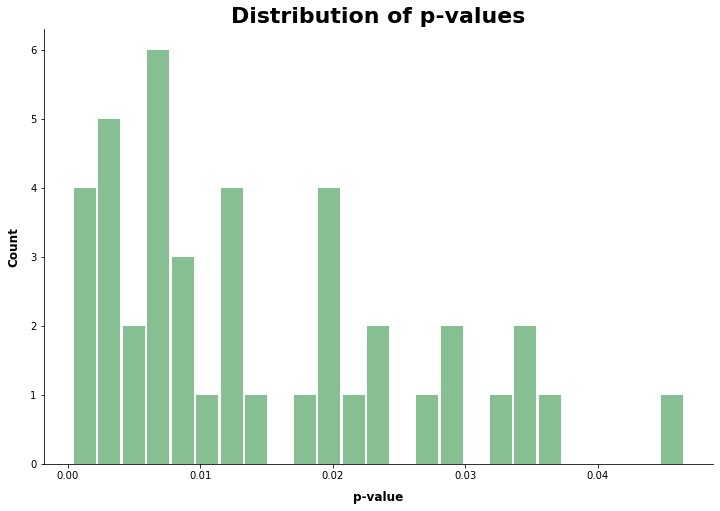

In [7]:
#Create a histogram and customise the plot. For exmaple the size of the bins and figure, the colour of the plot etc
ax = df_filter.hist(column='p-value', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
   
    x.tick_params(axis="both", which="both", bottom="off", labelleft="on")
        
    x.set_title("Distribution of p-values", fontsize=22, fontweight="bold")
    
    x.set_xlabel("p-value", labelpad=10, weight='bold', size=12)
    
    x.set_ylabel("Count", labelpad=10, weight='bold', size=12)

## Now I want to look at the difference in individual lipid levels between wildtype cells and CALHM2 knockout (KO) cells. One way to do this is by creating a grouped bar chart. To achieve this I need to filter the data to only contain the wildtype and CALHM2 KO cell columns and by resetting XCMS ID as the index, which contain the identifications of the individual lipids.

In [8]:
#filter the columns needed for the groupd bar chart and set the index to XCMS ID
GroupedBC = df_filter[['XCMS ID', 'Mean_wildtype', 'Mean_CALHM2 KO']].copy()
GroupedBC.set_index(["XCMS ID"], inplace=True)

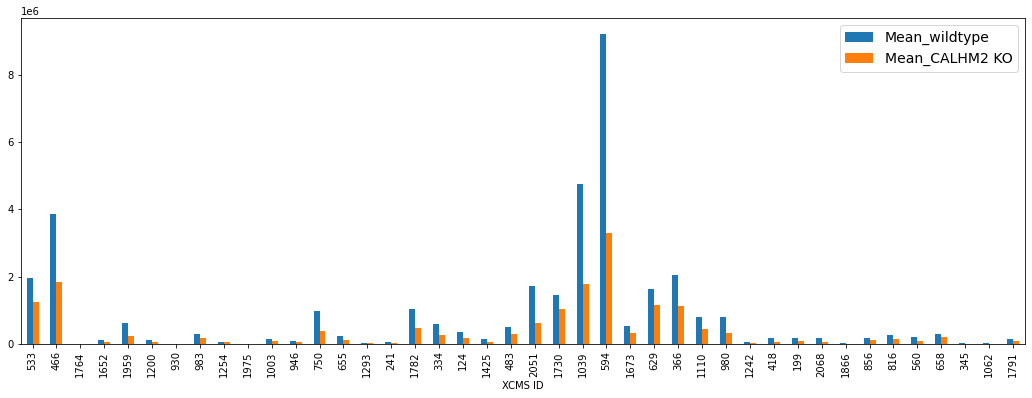

In [9]:
#plot the bar chart as wide as possible becasue there are 42 data points and plot the x-axis text as vertical to avoid the text overlapping
plt.rcParams['figure.figsize'] = (18,6)
GroupedBC.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.legend(bbox_to_anchor = (1,1), fontsize = 14)
plt.show()

## The above graph shows a comparison between individual lipid species of wildtype and CALHM2 KO cells. However, some lipid species are naturally present in higher concentrations than other lipids in the cell, making the cellular lipids with low levels difficult to visualise. Therefore, the data need to be normalised by setting the wildtype levels to 1 and dividing the CALHM2 KO lipid levels by the wildtype levels. This will normalise data, which will give the change in lipid levels in CALHM2 KO cells relative to wildtype cells, thereby allowing the data to be visualised better. I will also plot the results on 2 graphs to avoid having a large graph with multiple data.

In [10]:
#Normalise the data by making a duplicate of mean_wildtype and dividing the same columns to get a value of 1. 
#The mean wildtpye column is then divided by the respective CALHM2 KO, which will return the amount of change compared with wiltype cells
GroupedBC['WT_duplicate'] = GroupedBC['Mean_wildtype']
GroupedBC['Wildtype'] = GroupedBC['Mean_wildtype']/GroupedBC["WT_duplicate"] 
GroupedBC['Level_normalised_to_wildtype'] = GroupedBC['Mean_CALHM2 KO']/GroupedBC["WT_duplicate"] 
GroupedBC.head(1)

,Mean_wildtype,Mean_CALHM2 KO,WT_duplicate,Wildtype,Level_normalised_to_wildtype
XCMS ID,,,,,
533,1973710.11625,1250503.568183,1973710.11625,1.0,0.63358


In [11]:
#Drop the 'Mean_wildtype',  'Mean_CALHM2 KO' columns so the dataframe contains only the data needed to plot the grouped bar chart
GroupedBC.drop(columns =['Mean_wildtype',  'Mean_CALHM2 KO', 'WT_duplicate'], inplace = True)
GroupedBC.head(1)

,Wildtype,Level_normalised_to_wildtype
XCMS ID,,
533,1.0,0.63358


In [12]:
GroupedBC1 = GroupedBC.iloc[0:20]
GroupedBC2 = GroupedBC.iloc[21:43]

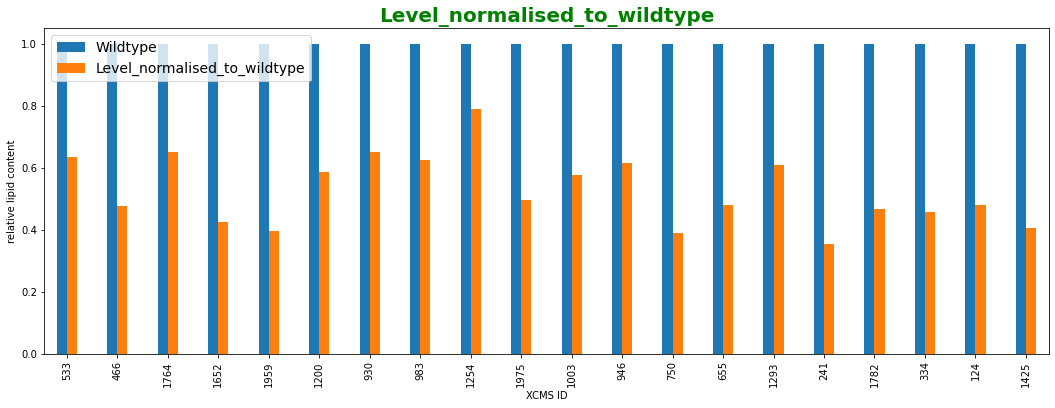

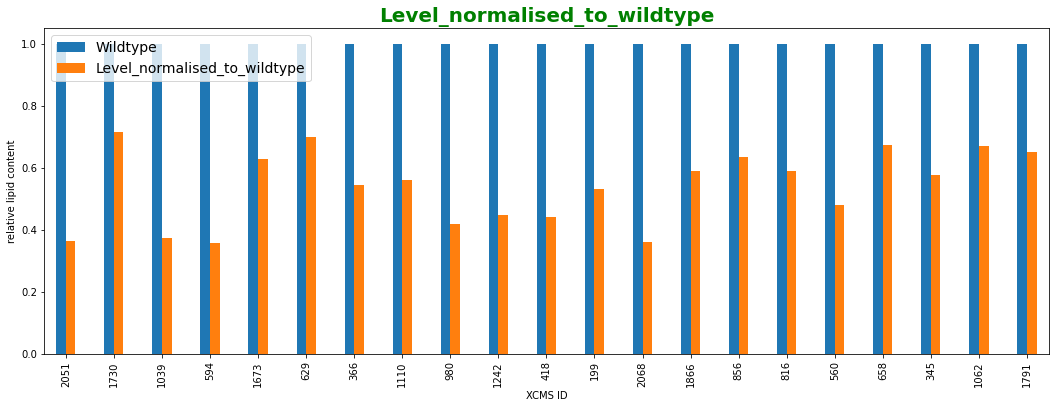

In [13]:
#plot the grouped bar chart as wide as possible
plt.rcParams['figure.figsize'] = (18,6)

GroupedBC1.plot(kind='bar', width=0.4)
plt.title('Level_normalised_to_wildtype',fontweight="bold", size=20, color="green")
plt.ylabel("relative lipid content")
plt.legend(loc='upper left', fontsize = 14)

GroupedBC2.plot(kind='bar', width=0.4)
plt.title('Level_normalised_to_wildtype',fontweight="bold", size=20, color="green")
plt.ylabel("relative lipid content")
plt.legend(loc='upper left', fontsize = 14)


plt.show()

## The above graph shows that lipid levels can be compared better when the data are normalised. From the graph, it appears lipids with the ID's 2051, 594, 2068, 1959, 750 and 241 show the largest decrease compared with the wildtype cells. Whereas lipids 1254 and 1730 show the least change.


## Next, I want to look for patterns in my data. To do this, I will plot a swarmplot from the seaborn package of the p-values against the CALHM2 KO cell lipid levels normalised to wildtype. I have used a seaborn plot because I can make the data points quite distinctive colours, which allows for better visualisation. First, the normalised data I generated above needs to be merged with the previous data set, so the data now contains the p-values and the relative change in lipid levels.

In [14]:
#Reset the index of the 2 dataframes and concatenate.
GroupedBC.reset_index(drop=True, inplace=True)
df_filter.reset_index(drop=True, inplace=True)
merged = pd.concat([df_filter, GroupedBC], axis=1)
merged.head(1)

,XCMS ID,name in HMDB,HMDB ID,Mean_wildtype,Mean_CALHM2 KO,t-statistic,p-value,Wildtype,Level_normalised_to_wildtype
0,533,SM(d18:1/18:1(9Z));SM(d18:1/18:1(11Z)),HMDB12101;HMDB12100,1973710.11625,1250503.568183,4.550065,0.006112,1.0,0.63358


## The p-values are very low numbers, which make it difficult to plot. Also the p-values contain many decimal places. Here I design a function to log transform the p-values and remove more than 5 decimal places, which will make the data easier to read and visualise on a graph.

In [15]:
def my_function(col):
    col1 = np.log10(col)
    col2 = col1.round(decimals=3)
    return(col2)
pvalue_col= merged['p-value']
my_function(pvalue_col).head(5)

0   -2.214
1   -2.197
2   -1.333
3   -1.702
4   -1.568
Name: p-value, dtype: float64

In [16]:
#Create a new column with the log transformed values
merged[['logpval']]=my_function(pvalue_col)
print(merged)

   XCMS ID                                       name in HMDB  \
0      533             SM(d18:1/18:1(9Z));SM(d18:1/18:1(11Z))   
1      466                            SM(d18:0/20:2(11Z,14Z))   
2     1764  PIP2(20:1(11Z)/16:0);PIP2(18:0/18:1(11Z));PIP2...   
3     1652  PI(22:6(4Z,7Z,10Z,13Z,16Z,19Z)/18:0);PS(MonoMe...   
4     1959  PI(18:2(9Z,12Z)/18:0);PI(18:1(9Z)/20:4(5Z,8Z,1...   
5     1200  PI(18:1(9Z)/18:3(9Z,12Z,15Z));PI(20:4(8Z,11Z,1...   
6      930  PGP(18:3(6Z,9Z,12Z)/18:2(9Z,12Z));PGP(18:3(9Z,...   
7      983  PG(18:1(9Z)/18:0);PG(18:1(11Z)/18:0);SM(d18:0/...   
8     1254  PG(16:1(9Z)/22:4(7Z,10Z,13Z,16Z));PG(18:2(9Z,1...   
9     1975  PG(16:1(9Z)/20:3(8Z,11Z,14Z));PG(16:1(9Z)/20:3...   
10    1003       PA(P-16:0e/18:2(9Z,12Z));Vinaginsenoside R12   
11     946  PA(18:1(11Z)/18:1(11Z));PA(18:1(11Z)/18:1(9Z))...   
12     750  MG(P-18:0e/0:0/0:0);Propylene glycol stearate;...   
13     655        MG(24:1(15Z)/0:0/0:0);MG(0:0/24:1(15Z)/0:0)   
14    1293               

In [17]:
#Check if the values have been transformed by the function and the new column has been created
merged.head(2)

,XCMS ID,name in HMDB,HMDB ID,Mean_wildtype,Mean_CALHM2 KO,t-statistic,p-value,Wildtype,Level_normalised_to_wildtype,logpval
0,533,SM(d18:1/18:1(9Z));SM(d18:1/18:1(11Z)),HMDB12101;HMDB12100,1973710.11625,1250503.568183,4.550065,0.006112,1.0,0.63358,-2.214
1,466,"SM(d18:0/20:2(11Z,14Z))",HMDB13465,3873629.46375,1847973.532783,4.507471,0.006356,1.0,0.477065,-2.197


## The graph below shows the log transformed p-values plotted against the relative change. As you can see there is a cluster of lipids between -3.439 and -2.456 that have low levels compared with wildtype cells (0.2-0.5).

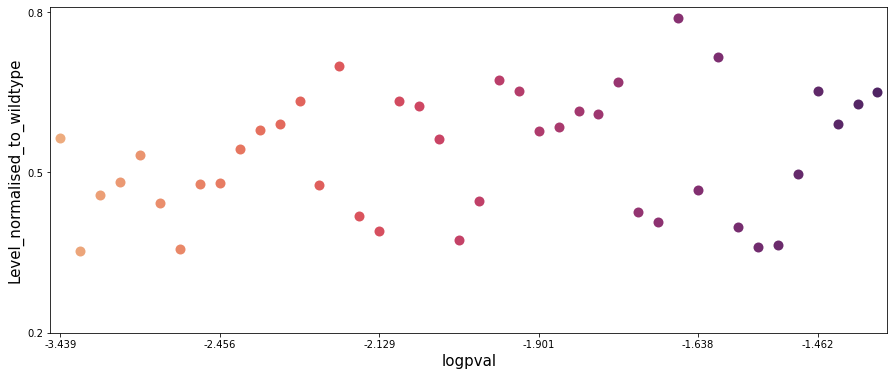

In [18]:
plt.figure(figsize=(15,6))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
ax = sns.swarmplot(x='logpval', y='Level_normalised_to_wildtype', data=merged, size=10, palette='flare')
ax.set(xticks=[0,8,16,24,32,38], yticks=[0.2, 0.5, 0.8])
plt.show()

## A better way to display the data is to group by lipid species and determine if certain lipid species cluster together. To group by lipid species I select the column 'HMDB' and chose the first two strings which represent the identities of the lipids. The lipid abbreviations are as follows, Ce, ceramide; MG, monoradyglycerol; PI, Phosphatidylinositol; PG, Phosphatidylglycerol; SM, Sphingomyelin; PA, Phosphatidic acid, LY, lysolipid.  

In [19]:
merged['lipid type'] = merged['name in HMDB'].str[:2]
merged['lipid type'].nunique()
merged['lipid type'].value_counts()

Ce    16
MG    13
PI     4
PG     4
SM     2
PA     2
Ly     1
Name: lipid type, dtype: int64

# First, I plot a scatterplot from the seaborn package to visually examine how many different lipids per species exist in the data set. As mentioned previously I prefer the colours that can be used in a seaborn plot. The fuschia colour is particularly distinctive. The graph below shows that monoradyglycerols and ceramides are the most represented lipids in the dataset

<AxesSubplot:xlabel='lipid type', ylabel='p-value'>

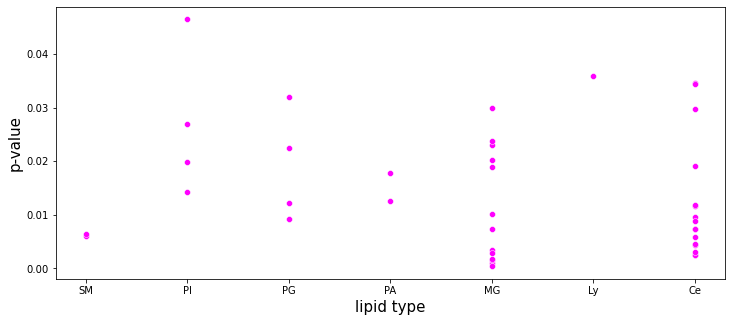

In [20]:
plt.figure(figsize=[12, 5])
seaborn.scatterplot(data=merged, x="lipid type", y="p-value", color = 'fuchsia')

## The graph below shows a scatterplot of the CALHM2 KO lipid levels normalised to wildtype cells against the p-value of the grouped lipids. The graphs shows a cluster of 4 MG lipid species at the bottom left of the image, which means these lipids have the lowest p-values (most significant) and have the biggest decrease compared with the wildtype cells.

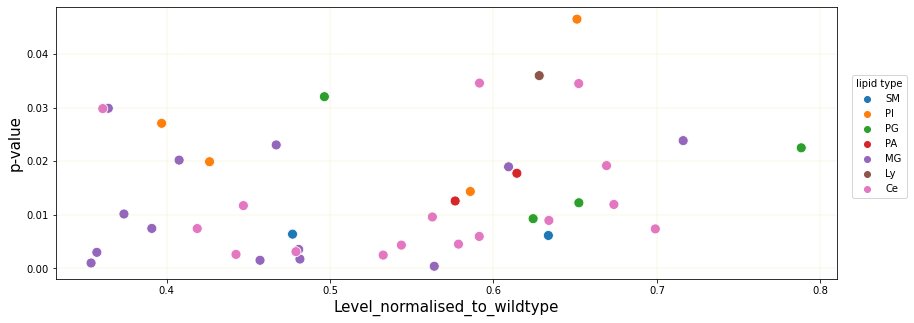

In [21]:
plt.figure(figsize=[14, 5]) 
seaborn.scatterplot(data=merged, x="Level_normalised_to_wildtype", y="p-value", hue="lipid type", palette="tab10",  s=100)
plt.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0, title='lipid type')
plt.grid(color='y', ls = '-.', lw = 0.15)

## Another way to visualise the data is to use a violinplot from the seaborn package. The width of the violins represent the number of lipids per species. MG contains the most lipids so it has the largest width. In addition, the median (as shown by the white dot) is lowest in the MG lipids. Despite only 4 PG lipids present in the dataset, the violinplot shows a large distribution of the data (shown by the length of the rectangular grey box). The data thus far point to MG lipids being the most significantly changed in Calhm2 KO cells. 

In [22]:
#Violin plots must contain floats. As can be seen below Level_normalised_to_wildtype is an object.
type=merged.dtypes
print(type)

XCMS ID                          object
name in HMDB                     object
HMDB ID                          object
Mean_wildtype                    object
Mean_CALHM2 KO                   object
t-statistic                     float64
p-value                         float64
Wildtype                         object
Level_normalised_to_wildtype     object
logpval                         float64
lipid type                       object
dtype: object


In [23]:
#Here I convert the column into a float to allow the data to be plotted on a violin plot.
merged["Level_normalised_to_wildtype"] = merged.Level_normalised_to_wildtype.astype(float)

<AxesSubplot:xlabel='lipid type', ylabel='Level_normalised_to_wildtype'>

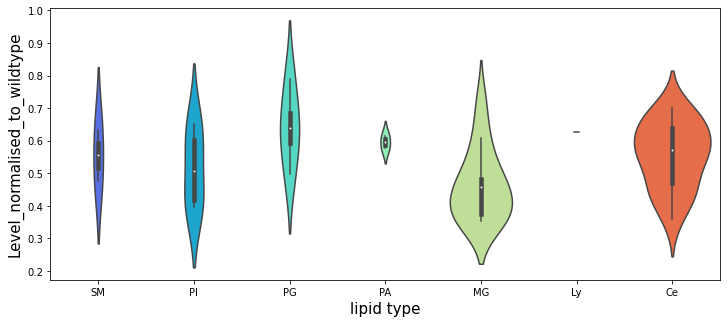

In [24]:
plt.figure(figsize=[12, 5])
seaborn.violinplot(x="lipid type", y="Level_normalised_to_wildtype", data=merged,palette='rainbow', scale="count")

## As the data and graphs suggest MG lipids are the most significantly changed in CALHM2 KO cells, I therefore have filtered the MG lipids and then further filtered for the lipid with the lowest p-value. In addition from the earlier graphical analysis it was noted that lipids 2051, 594, 2068, 1959, 750 and 241 had the largest change compared to wildtype. Note lipid 750 is top of the dataframe and the data has been sorted.

In [25]:
#Filter the MG lipids from the dataframe and sort by their p-value
MG = merged[merged['lipid type'].str.contains("MG")]
MG.sort_values(["p-value"], ascending=False)
MG.head(12)

,XCMS ID,name in HMDB,HMDB ID,Mean_wildtype,Mean_CALHM2 KO,t-statistic,p-value,Wildtype,Level_normalised_to_wildtype,logpval,lipid type
12,750,MG(P-18:0e/0:0/0:0);Propylene glycol stearate;...,HMDB11153;HMDB29764;HMDB35571;HMDB35570,991061.87795,387474.5719,4.340140,0.007428,1.0,0.390969,-2.129,MG
13,655,MG(24:1(15Z)/0:0/0:0);MG(0:0/24:1(15Z)/0:0),HMDB11589;HMDB11559,259054.21465,124566.633357,5.187579,0.003503,1.0,0.480852,-2.456,MG
14,1293,MG(24:0/0:0/0:0);MG(0:0/24:0/0:0),HMDB11588;HMDB11558,40369.041507,24594.140209,3.415353,0.018933,1.0,0.609233,-1.723,MG
15,241,MG(22:1(13Z)/0:0/0:0);MG(0:0/22:1(13Z)/0:0),HMDB11582;HMDB11552,80518.19109,28488.446428,6.911530,0.000972,1.0,0.353814,-3.012,MG
16,1782,MG(22:1(13Z)/0:0/0:0);MG(0:0/22:1(13Z)/0:0),HMDB11582;HMDB11552,1053204.823275,491931.412492,3.237410,0.023015,1.0,0.467080,-1.638,MG
17,334,"MG(18:2(9Z,12Z)/0:0/0:0);MG(0:0/18:2(9Z,12Z)/0:0)",HMDB11568;HMDB11538,602922.7597,275637.918943,6.302601,0.001480,1.0,0.457170,-2.830,MG
18,124,MG(18:1(11Z)/0:0/0:0);MG(18:1(9Z)/0:0/0:0);Pal...,HMDB11566;HMDB11567;HMDB13648;HMDB11537;HMDB11...,373412.61435,179833.09462,6.104940,0.001708,1.0,0.481594,-2.767,MG
19,1425,MG(18:1(11Z)/0:0/0:0);MG(18:1(9Z)/0:0/0:0);MG(...,HMDB11566;HMDB11567;HMDB11537;HMDB11536;HMDB32...,146571.1627,59753.931847,3.356613,0.020182,1.0,0.407679,-1.695,MG
20,483,MG(18:0e/0:0/0:0),HMDB11143,516134.387025,290978.746508,8.531572,0.000364,1.0,0.563765,-3.439,MG
21,2051,MG(16:0/0:0/0:0);MG(0:0/16:0/0:0);Glycerol 1-h...,HMDB11564;HMDB11533;HMDB31074,1739280.2691,633719.674533,3.006824,0.029864,1.0,0.364357,-1.525,MG


In [26]:
#Select row 1 of the dataframe to filter for the most significant p-value.
MG_Filter = MG.iloc[[0]]

In [27]:
#Remove the columns that are not needed for the next analysis.
cols = [3,4,5,6,7,8,9,10]
MG_Filter.drop(MG_Filter.columns[cols], axis =1, inplace = True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [28]:
MG_Filter

,XCMS ID,name in HMDB,HMDB ID
12,750,MG(P-18:0e/0:0/0:0);Propylene glycol stearate;...,HMDB11153;HMDB29764;HMDB35571;HMDB35570


## I have filtered the lipid with the highest p-value. However, as can be seen in column 'HMDB', the potential lipid has 4 identities becasue the mass spectrometry analysis identifies the lipids by both mass and charge, which is one of the drawbacks of this lipidomics analysis. Therefore, these 4 lipids are identical in mass and charge.  I next split the lipids into individual rows by removing the punctuations that separate them.

In [29]:
#Select the column 'name in HMDB' and split the text by use of a semi-colon, which is currently separating the lipids and put into a variable x.
lst_col = 'name in HMDB'
x = MG_Filter.assign(**{lst_col:MG_Filter[lst_col].str.split(';')})
x

,XCMS ID,name in HMDB,HMDB ID
12,750,"[MG(P-18:0e/0:0/0:0), Propylene glycol stearat...",HMDB11153;HMDB29764;HMDB35571;HMDB35570


In [30]:
#Unlist the x values and put in rows
top_lipid=pd.DataFrame({
    col:np.repeat(x[col].values, x[lst_col].str.len())
    for col in x.columns.difference([lst_col])
    }).assign(**{lst_col:np.concatenate(x[lst_col].values)})[x.columns.tolist()]

top_lipid

,XCMS ID,name in HMDB,HMDB ID
0,750,MG(P-18:0e/0:0/0:0),HMDB11153;HMDB29764;HMDB35571;HMDB35570
1,750,Propylene glycol stearate,HMDB11153;HMDB29764;HMDB35571;HMDB35570
2,750,"4,6-Heneicosanedione",HMDB11153;HMDB29764;HMDB35571;HMDB35570
3,750,"6,8-Heneicosanedione",HMDB11153;HMDB29764;HMDB35571;HMDB35570


In [31]:
#A similar process is needed to separate the columns in the HMDB ID column, the explode will then transform each element of the list to a row.
splitHMDB = top_lipid['HMDB ID'].str.split(';').explode()

In [32]:
splitHMDB.head()

0    HMDB11153
0    HMDB29764
0    HMDB35571
0    HMDB35570
1    HMDB11153
Name: HMDB ID, dtype: object

In [33]:
# Reset the index of the two columns I created so they can be merged and drop the column that contains the unseparated values.
splitHMDB.reset_index(drop=True)
top_lipid.reset_index(drop=True)

top_lipid.drop(columns =['HMDB ID'], inplace=True)

In [34]:
HMDB = DataFrame(splitHMDB,columns=['HMDB ID'])
HMDB.reset_index(drop=True, inplace=True)

In [35]:
#Select the first 4 rows of the HMDB ID dataframe so it can be merged with the top_lipid dataframe
split_HMDB = HMDB.iloc[0:4] 

In [36]:
#Check if the individual lipids have been spearated and added to new rows
split_HMDB.head()

,HMDB ID
0,HMDB11153
1,HMDB29764
2,HMDB35571
3,HMDB35570


In [37]:
#Concatanate the two columns together that are now separated to give the individual lipid and their respecitive HMDB ID numbers.
pd.concat((top_lipid, split_HMDB), axis=1)

,XCMS ID,name in HMDB,HMDB ID
0,750,MG(P-18:0e/0:0/0:0),HMDB11153
1,750,Propylene glycol stearate,HMDB29764
2,750,"4,6-Heneicosanedione",HMDB35571
3,750,"6,8-Heneicosanedione",HMDB35570


## The above data shows the 4 lipids that are the most significantly changed in CALHM2 KO cells compared with wildtype cells. There is very little data on Propylene glycol stearate in the heart. Indeed, this is a lipid that is primarly used in cosmetics [9]. Heneicosanedione are lipids that are ingested from fats and oils [10] and most likely appear in this dataset as a result of being present in the culture medium that the cells were grown in. Therefore, it is likely that the lipid with ID, HMDB111153 is the most donwregulated lipid in the CALHM2 KO cells with (patho)pyhsiological relevance.

# Aim 2

## The next aim of the project is to find more information about the lipid that is most changed in the dataset, HMDB11153. The first part of this aim is to webscrape the description of the lipid from the HMDB website. First, I make a request for the data from the webpage that contains information about HMDB11153 and add the text in a variable and print the text.

In [38]:
headers = {

}
# request a resource from a specific URL. 
r  = requests.get("https://hmdb.ca/metabolites/HMDB0011153")#,headers)

# store the text returned in a variable
data = r.text

data

'<!DOCTYPE html><html><head><link href="/assets/favicon-9531cde275d5419775671ec3320c1245747b762c98fb8c2d800f1ddfdb4f42c9.png" rel="icon" type="image/png" /><meta content="width=device-width, initial-scale=1.0" name="viewport" /><meta content="text/html; charset=UTF-8" http-equiv="Content-Type" />\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"43e8954a0b","applicationID":"744542","transactionName":"dlxZEUpWWVpdQUsOVkFSVQpUUEFTSxwXC1xC","queueTime":0,"applicationTime":103,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).loader_config={xpid:"VQUGVVJVGwQEUFRWBQ==",licenseKey:"43e8954a0b",applicationID:"744542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},i,i.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<n.length;i++)r(n[i]);re

In [39]:
# here I parse the raw HTML into a soup object. To extract the description of HMDB11153, I search for td tags that belong to the 
#class 'met-des'c and save in a variable called description 
soup = BeautifulSoup(data, "html.parser")
description = soup.find_all('td', attrs={'class': 'met-desc'})[0].text
print(description)

1-(1Z-octadecenyl)-sn-glycerol is an ether lipid. Ether lipids are lipids in which one or more of the carbon atoms on glycerol is bonded to an alkyl chain via an ether linkage, as opposed to the usual ester linkage. Plasmalogens are glycerol ether phospholipids. They are of two types, alkyl ether (-O-CH2-) and alkenyl ether (-O-CH=CH-). Dihydroxyacetone phosphate (DHAP) serves as the glycerol precursor for the synthesis of plasmalogens. Three major classes of plasmalogens have been identified: choline, ethanolamine and serine derivatives. Ethanolamine plasmalogen is prevalent in myelin. Choline plasmalogen is abundant in cardiac tissue. Usually, the highest proportion of the plasmalogen form is in the ethanolamine class with rather less in choline, and commonly little or none in other phospholipids such as phosphatidylinositol. In choline plasmalogens of most tissues, a higher proportion is often of the O-alkyl rather than the O-alkenyl form, but the reverse tends to be true in heart l

## The above text shows the description for HMDB11153 scrapped from the HMDB website. As can be seen, HMDB11153 is an 1-(1Z-octadecenyl)-sn-glycerol ether lipid. Interestingly, a type of ether lipid 'choline plasmalogen' is present in cardiac tissue. The O-alkenyl form of choline plasmalogen is present in cardiac tissue. 

# Aim 2

## The next part of this project is to find more information about the sn-glycerol lipids identified above. Here I plan to scrape ten abstracts from a PubMed search of 'sn-glycerol' review articles. Then I will extract features from the abstracts by performing TF-IDF to look for word importance in the documents as well as generating a WordCloud to find keywords in the abstract, which may give information as to the function of this lipid.

In [40]:
# This is simple representation of a Publication and an object has been created that has 3 simple properties; a link, a title and an abstract. 
#The second part of the function is to deal with error handling. For example if this function was only able to scrape 9 abstracts 
#instead of 10, the function would notify there is a problem but the error would be handled and the function would continue with the 9 abstracts. 
#The error handling can be tested, for example if a typo is introudced in 'enc-abstract', the function would throw an exception
#and the function will jump to an exception so that error can be handled.The final function inside this class will clean the text that has been scrapped from the website.
class Publication:
    link = ''
    title = ''
    abstract = ''  
    
    def __init__(self, link):
        self.link = link
    
    def load_details(self):
        try:
            content = requests.get(self.link)
            publication_soup = BeautifulSoup(content.text, 'html.parser')
            self.title = publication_soup.title.string
            self.abstract = publication_soup.find_all('div', attrs={'id': 'enc-abstract'})[0].text
        except Exception as e:
            print('** There was an error loading the publication at ' + self.link + ' **')
            print(e)
        
    def get_pretty_print_string(self):
        pretty_print = '\n\n'
        pretty_print += self.title.strip()
        pretty_print += '\n'
        pretty_print += '(' + self.link + ')'
        pretty_print += '\n\n'
        pretty_print += self.abstract.strip()
        pretty_print += '\n'
        pretty_print += '\n'
        pretty_print += '----------'
        return pretty_print
        
        
publications = []
site_url = 'https://pubmed.ncbi.nlm.nih.gov'
search_string = '/?term=1-%281Z-octadecenyl%29-sn-glycerol&filter=pubt.review&sort=date'

# Load the search results page
content = requests.get(site_url + search_string)
soup = BeautifulSoup(content.text, 'html.parser')
    
# Loop through each result and load the publication details
search_result_links = soup.find_all('a', attrs={'class': 'docsum-title'})
for link_to_publication in search_result_links:
    publication = Publication(site_url + link_to_publication.get('href'))
    publication.load_details()
    print(publication.get_pretty_print_string())




The endocannabinoid system in the adipose organ - PubMed
(https://pubmed.ncbi.nlm.nih.gov/33387286/)

The endocannabinoid system is found in most, if not all, mammalian organs and is involved in a variety of physiological functions, ranging from the control of synaptic plasticity in the brain to the modulation of smooth muscle motility in the gastrointestinal tract. This signaling complex consists of G protein-coupled cannabinoid receptors, endogenous ligands for those receptors (endocannabinoids) and enzymes/transporters responsible for the formation and deactivation of these ligands. There are two subtypes of cannabinoid receptors, CB1 and CB2, and two major endocannabinoids, arachidonoylethanolamide (anandamide) and 2-arachidonoyl-sn-glycerol (2-AG), which are produced upon demand through cleavage of distinct phospholipid precursors. All molecular components of the endocannabinoid system are represented in the adipose organ, where endocannabinoid signals are thought to regulate cr



Cardiolipin metabolism and the role it plays in heart failure and mitochondrial supercomplex formation - PubMed
(https://pubmed.ncbi.nlm.nih.gov/24801725/)

Cardiolipin is a major membrane phospholipid in the mitochondria and is essential for cellular energy metabolism mediated through mitochondrial oxidative phosphorylation. Recent studies indicate that it plays a diverse role in cellular metabolism. Eukaryotic cardiolipin is synthesized de novo from phosphatidic acid via the cytidine-5'-diphosphate-1,2-diacyl-sn-glycerol pathway and is deacylated to monolysocardiolipin in order for it to be remodelled into the form that is observed in mitochondrial membranes. This resynthesis of deacylated cardiolipin from monolysocardiolipin occurs via the Barth Syndrome gene product tafazzin and acyllysocardiolipin acyltransferase-1, monolysocardiolipin acyltransferase-1 and the alpha subunit of trifunctional protein. Heart failure is a disease condition in which the amount and type of cardiolipi

In [41]:
#Here 3 unittest have been performed to test the above function. To do this I have imported unittest to write and run the tests
#on the above function and the publication object that was generated. I have used the setUp() and tearDown() methods to allow 
# instructions to be defined and executed before and after each test method. I have specifically designed this unittest to check 
#if the function contains the link, the title of the abstract and the abstract. As can be seen all the 3 tests are passed.

import unittest

class PublicationTests(unittest.TestCase):
    
    def setUp(self):
        publication = Publication('test_link')
        publication.title = 'test_title'
        publication.abstract = 'test_abstract'
        self.publication = publication
        
    def tearDown(self):
        pass
    
    def test_pretty_print_includes_link(self):
        self.assertTrue('test_link' in self.publication.get_pretty_print_string())
        
    def test_pretty_print_includes_title(self):
        self.assertTrue('test_title' in self.publication.get_pretty_print_string())
        
    def test_pretty_print_includes_abstract(self):
        self.assertTrue('test_abstract' in self.publication.get_pretty_print_string())

        
res = unittest.main(argv=[''], verbosity=2, exit=False)

test_pretty_print_includes_abstract (__main__.PublicationTests) ... ok
test_pretty_print_includes_link (__main__.PublicationTests) ... ok
test_pretty_print_includes_title (__main__.PublicationTests) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


## I have saved the text from the above webscrape in a text file. Here I open the file and print the first 1000 characters as well as making a copy of the text, so I can come back to the original unprocessed text file later in the code if needed.

In [42]:
text = open('1-(1Z-octadecenyl)-sn-glycerol.txt', 'r',encoding='utf-8').read()
text[:1000]
text2 = copy.copy(text)

## Here I will create a wordlcoud and compare lemmatization with stemming to determine if there are differences in the key words that are used in the WordCloud. 


In [43]:
#Create a function to lemmatize and tokenise the text from the scraped abstracts
def clean(text):
    nltk.download('wordnet')
    lemmatizer = WordNetLemmatizer()
    cleaned_lemmatized_tokens = [lemmatizer.lemmatize(word.lower()) \
                                 for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', text))]
    return cleaned_lemmatized_tokens

In [44]:
#Print out the most common 20 tokens. As can be seen a number of stopwords are present, therefore these will need removed when creating the WordCloud
Counter(clean(text)).most_common(20)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[('the', 123),
 ('of', 105),
 ('and', 80),
 ('in', 75),
 ('to', 43),
 ('a', 40),
 ('is', 29),
 ('lipid', 22),
 ('sn', 16),
 ('have', 16),
 ('that', 16),
 ('this', 15),
 ('are', 15),
 ('membrane', 15),
 ('disease', 13),
 ('cardiolipin', 13),
 ('function', 12),
 ('for', 12),
 ('2', 12),
 ('glycerol', 12)]

# Here I produce a WordCloud of the preprocessed text to find important words in the absract that may give an idea of the function of sn-glycerol lipids.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


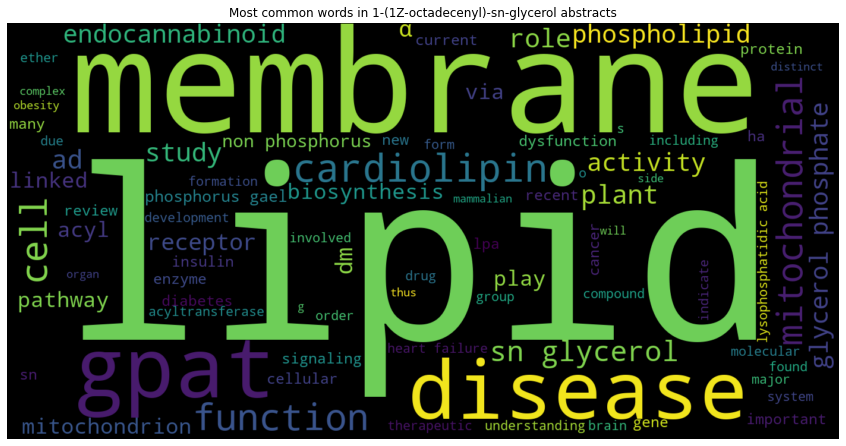

In [45]:
#Make a WordCloud with the following parameter and make sure stop words are removed such as 'the' and 'of'.
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(clean(text))
wordcloud = WordCloud(width = 1400, height = 700, 
                background_color ='black', 
                max_words=80,
                stopwords = stopwords, 
                min_font_size = 11, max_font_size=400).generate(cleaned_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most common words in 1-(1Z-octadecenyl)-sn-glycerol abstracts') 
plt.tight_layout(pad=0)
plt.show()

# The lemmatized WordCloud shows the words lipids, membrane, disease and mitochondria are important in the text. Next, I create a Wordcloud with stemmed words.

In [46]:
#create a function to tokenize and stem the text in 'text 2', which was copy of the unprocessed text made earlier. 
#I have made a for loop inside this function to repeat the stemming on all the words in the document
stemmer=PorterStemmer()
stemmer.stem


def stemSentence(text):
    token_words=word_tokenize(text)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(stemmer.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

stem=stemSentence(text2)

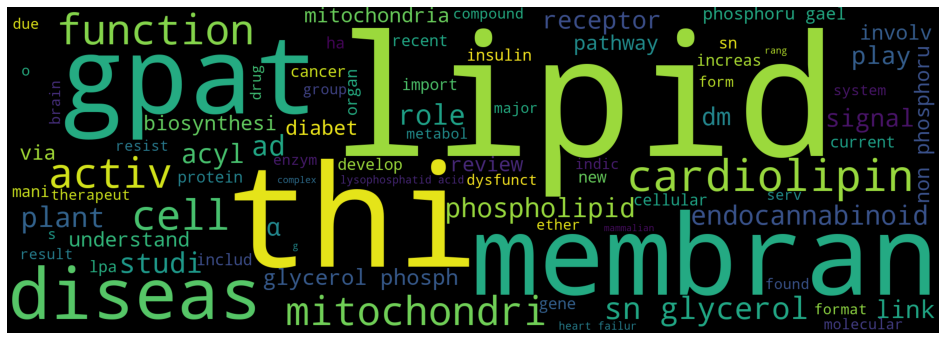

In [47]:
import sys
#sys.path.append("/usr/local/lib/python2.7/dist-packages")

wordcloud = WordCloud(width=2000, height=700, max_words=80).generate(stem)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## The stemmed WordCloud shows similar key words to the lemmatzed WordCloud, such as lipid, membrane. Overall the lemmatized WordCloud is more useful because the stemmed version cuts the last words of the text to make words such as 'membran', 'diseas' also it has stemmed mitochondrial to produce two versions; 'mitochondri' and 'miotchondria', which was not helpful as they have the same definition. Overall, the lematized version proudced the better WordCloud.

## Here I make a word cloud in the shape of a heart since this project originated from a patient with heart disease. The words; membrane, lipid and GPAT (enzyme involved in the de novo pathway of glycerolipid synthesis) stand out in this word cloud as opposed to lipid and membrane in the previous word clouds. I believe the words in the word cloud below appear more prominently than the 2 word clouds above.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


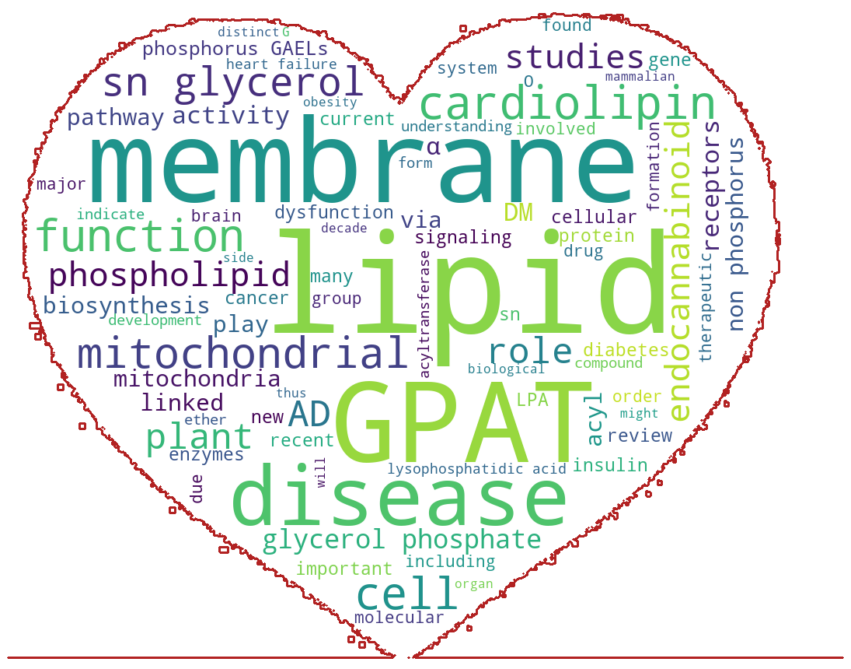

In [48]:
stopwords = set(STOPWORDS)
cleaned_text = ' '.join(clean(text))
mask1 = np.array(Image.open('heart.png'))

heart = WordCloud(background_color="white", max_words=80, mask=mask1,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

heart.generate(text)

plt.figure(figsize=[15,15])
plt.imshow(heart, interpolation='bilinear')
plt.axis("off")
plt.show()

# Aim3

## The final part of the study will determine which disease the lipid sn-glycerol is most similar to by performing document similarity of abstracts from reviews of specific diseases, such as cancer and cardiovascular disease. Here I have collected abstracts from reviews of certain diseases; neurodegeneration (neuro), cancer, cardiovascular (CVD) disease, mitochondrial (mito) disease and sn_glycerol. In addition, I will calculate the TF-IDF scores to determine which words in the documents are distinctively frequent, which may give a clue to the function of sn_glycerol.  

In [49]:
#Get a list if strings from 5 text files saved in the folder absracts, which are abstracts from reviews on cancer, neurodegenration,
#cardiovascular disease, sn-glyceol and mitochondrial disease. This function creates 1 empty list for the body of text. It uses the glob module to identify the files that match a specific pattern '.txt' in this case in the file path. 
# It opens the files, reads them, strips white space and replaces empty lines. Then appends the text files in the corpus list. It is also good practice to close the file as this reduces the risk of the file being unwarrantedly modified or read
def process_txt_files(fpath):
    corpus_list = []
    remove_punct = '.,();:'
    for h in glob.glob(os.path.join(fpath, '*.txt')):
        h = open(h, 'r')
        txt_files = h.read().strip().replace('\n', ' ').replace(' ', ' ')
        for a in remove_punct:
            txt_files = txt_files.replace(a, "")
        h.close()
        corpus_list.append(txt_files)
    return corpus_list

In [50]:
corpus = process_txt_files('./abstracts')

In [51]:
#Initiate vectorizer and count words in text
doc = CountVectorizer(stop_words='english', max_df=0.8, min_df=2)
words=doc.fit_transform(corpus)
words.shape
print(words)

  (0, 544)	10
  (0, 297)	3
  (0, 535)	1
  (0, 235)	4
  (0, 267)	6
  (0, 476)	2
  (0, 581)	1
  (0, 575)	2
  (0, 198)	1
  (0, 363)	3
  (0, 128)	4
  (0, 548)	1
  (0, 524)	2
  (0, 503)	2
  (0, 570)	1
  (0, 390)	1
  (0, 542)	1
  (0, 4)	3
  (0, 55)	1
  (0, 277)	2
  (0, 504)	5
  (0, 242)	3
  (0, 603)	1
  (0, 456)	3
  (0, 354)	2
  :	:
  (4, 312)	1
  (4, 81)	2
  (4, 597)	1
  (4, 188)	3
  (4, 565)	3
  (4, 222)	1
  (4, 296)	2
  (4, 463)	7
  (4, 356)	1
  (4, 94)	1
  (4, 108)	1
  (4, 473)	1
  (4, 187)	1
  (4, 590)	1
  (4, 250)	4
  (4, 281)	1
  (4, 400)	1
  (4, 325)	1
  (4, 567)	1
  (4, 365)	1
  (4, 359)	1
  (4, 641)	1
  (4, 329)	1
  (4, 419)	1
  (4, 519)	1


In [52]:
#converts to array and print word count.
print(words.toarray())

[[1 1 1 ... 1 0 5]
 [1 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 1]
 [0 3 1 ... 1 0 1]]


In [53]:
#Calculate the IDF weights of the word count vector. Convert the IDF values to a dataframe.
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(words)
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=doc.get_feature_names(), columns = ['idf_weights'])
df_idf.sort_values(by=['idf_weights']).head(10)

,idf_weights
molecular,1.182322
cellular,1.182322
protective,1.182322
cause,1.182322
gene,1.182322
cardiovascular,1.182322
promising,1.182322
genes,1.182322
cancer,1.182322
genetic,1.182322


## The above dataframe shows the top 20 TF-IDF scores in the text of the abstracts. Interestingly, cardiovascular and cancer appear as important words.

## Finally, I perform a document similarity analysis with a Euclidean distance matrix and a cosine similarity matrix of the abstracts from reviews of 4 diseases and compare with the text from abstracts on reviews of sn_glycerol lipids. This will help me determine which disease sn_glycerol is more closely associated with and allow for a comparison between Euclidean distance and cosine distance.

In [54]:
abstracts = ['Cancer.txt', 'Neuro.txt', 'CVD.txt', 'sn_glycerol.txt', 'Mito.txt']
abstracts

['Cancer.txt', 'Neuro.txt', 'CVD.txt', 'sn_glycerol.txt', 'Mito.txt']

In [55]:
#create a variable with the CountVectorizer class and use the fit_transform method on the text with this Class Object. Print the matrix with the occurrence count of the words. 

vectorizer = CountVectorizer(input = 'filename', stop_words='english')
words = vectorizer.fit_transform(abstracts).toarray()
words

array([[1, 1, 1, ..., 0, 0, 2],
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 6, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
print(vectorizer.get_feature_names())

['00', '01', '02', '05', '07', '08', '09', '100', '106', '11', '12', '13', '146a', '15', '1540', '17', '1706', '18', '19', '196a2', '1r', '1β', '2010', '2016', '2019', '2020', '2021', '2050', '21', '22', '23', '24', '25', '27a', '28', '31', '34', '3β', '40', '423', '466', '47', '499', '50', '55', '56', '57', '59', '60', '64', '65', '66', '661', '67', '70', '71', '74', '788', '83', '86', '87', '900', '93', '95', '99', 'a2', 'aav', 'aberrant', 'ability', 'able', 'abnormal', 'abnormalities', 'abnormality', 'absence', 'absolute', 'accelerated', 'accelerating', 'access', 'accompanied', 'according', 'accordingly', 'accumulation', 'accurately', 'acid', 'acidic', 'acids', 'acp', 'acquire', 'act', 'action', 'activated', 'activating', 'activation', 'activator', 'active', 'activities', 'activity', 'acts', 'acute', 'acyl', 'acylation', 'acyllysocardiolipin', 'acyltransferase', 'acyltransferases', 'ad', 'adapt', 'adaptation', 'adaptive', 'addition', 'additional', 'address', 'adeno', 'adenosine', 'a

In [57]:
# Calculate the distance matrix
distance_matrix_abstract = distance_matrix(words,words)
distance_matrix_abstract

array([[ 0.        , 85.44003745, 90.        , 91.80413934, 89.83874443],
       [85.44003745,  0.        , 70.25667228, 70.78135348, 55.95533933],
       [90.        , 70.25667228,  0.        , 78.66384176, 73.97972695],
       [91.80413934, 70.78135348, 78.66384176,  0.        , 73.57309291],
       [89.83874443, 55.95533933, 73.97972695, 73.57309291,  0.        ]])

In [58]:
# Convert to a DataFrame. 
distance_matrix_df = pd.DataFrame(distance_matrix_abstract, index = abstracts, columns = abstracts)
print(distance_matrix_df)

                 Cancer.txt  Neuro.txt    CVD.txt  sn_glycerol.txt   Mito.txt
Cancer.txt         0.000000  85.440037  90.000000        91.804139  89.838744
Neuro.txt         85.440037   0.000000  70.256672        70.781353  55.955339
CVD.txt           90.000000  70.256672   0.000000        78.663842  73.979727
sn_glycerol.txt   91.804139  70.781353  78.663842         0.000000  73.573093
Mito.txt          89.838744  55.955339  73.979727        73.573093   0.000000


In [59]:
distance_matrix_df.style.background_gradient(cmap='bwr', axis =None).set_precision(2)

,Cancer.txt,Neuro.txt,CVD.txt,sn_glycerol.txt,Mito.txt
Cancer.txt,0.00,85.44,90.00,91.80,89.84
Neuro.txt,85.44,0.00,70.26,70.78,55.96
CVD.txt,90.00,70.26,0.00,78.66,73.98
sn_glycerol.txt,91.80,70.78,78.66,0.00,73.57
Mito.txt,89.84,55.96,73.98,73.57,0.00


In [60]:
# Peforme Cosine Similarity on the vectors created earlier.
cosine = cosine_similarity(words, words)
print(cosine)

[[1.         0.24930972 0.23573837 0.18780046 0.21630598]
 [0.24930972 1.         0.36789066 0.33841174 0.58255931]
 [0.23573837 0.36789066 1.         0.27345904 0.35047357]
 [0.18780046 0.33841174 0.27345904 1.         0.34014133]
 [0.21630598 0.58255931 0.35047357 0.34014133 1.        ]]


In [61]:
# Convert to a DataFrame.
cosine_matrix = cosine_similarity(words)
cosine_df = pd.DataFrame(cosine_matrix, index = abstracts, columns = abstracts)
cosine_df

,Cancer.txt,Neuro.txt,CVD.txt,sn_glycerol.txt,Mito.txt
Cancer.txt,1.000000,0.249310,0.235738,0.187800,0.216306
Neuro.txt,0.249310,1.000000,0.367891,0.338412,0.582559
CVD.txt,0.235738,0.367891,1.000000,0.273459,0.350474
sn_glycerol.txt,0.187800,0.338412,0.273459,1.000000,0.340141
Mito.txt,0.216306,0.582559,0.350474,0.340141,1.000000


In [62]:
#Colour the text in a gradient style to allow for better visualisation of the data
cosine_df.style.background_gradient(cmap='bwr', axis =None).set_precision(2)

,Cancer.txt,Neuro.txt,CVD.txt,sn_glycerol.txt,Mito.txt
Cancer.txt,1.00,0.25,0.24,0.19,0.22
Neuro.txt,0.25,1.00,0.37,0.34,0.58
CVD.txt,0.24,0.37,1.00,0.27,0.35
sn_glycerol.txt,0.19,0.34,0.27,1.00,0.34
Mito.txt,0.22,0.58,0.35,0.34,1.00


## Both methods for analysing text similarity are fairly similar, and there is no striking link here between sn-glycerol and any particular disease. The closest diseases were neurodegeneration and mitochondria. Interestingly, mitochondria appeared in the word cloud. In addition, the brain appeared in the word cloud, which could be releavnt for neurodegeneration. Next time, I could use more abstracts and more diseases to further analyse the distance similarity between these abstracts. Of note, a link between mitochondria and neurodegeneration was shown in the above analysis, which is well known and serves as a positive control to show the text similarity analysis was successful.

# Conclusion

In this analysis, I aimed to identify which lipid and lipid groups are most significantly changed with pathophysiological relevance in CALHM2 ( a gene identified from a patient with cardiovascular disease) depleted cells compared with wildtype cells. In addition, I aimed to discover information about this particular lipid through a combination of techniques, including web scraping and Natural Language Processing. The analysis found that lipid MG(P-18:0/0:0/0:0), an sn-glycerol lipid belonging to the Monoradylglycerol family was the most pathophysiological downregulated lipid in CALHM2 depleted cells. A graphical analysis showed that monoradylglycerol lipids were predominantly present in the dataset after filtering, and a cluster of these lipids was identified with low p-values, as shown by a swarm plot. The parameters in the seaborn package allowed me to identify these lipids as I was able to group the lipids by distinctive colours to identify clusters of lipids. In particular, the violin plot was able to show the distribution and median of the grouped data. Indeed, monoglyceride lipase activity, which is an enzyme that converts monoacylglycerides to free fatty acids and glycerol, is present in cardiac tissue [12]. Furthermore, mammalian monoacylglycerol lipase contributes to over 90% of cellular fatty acid ethyl esters hydrolase activity [13], and loss of this enzyme is known to be detrimental to the function of the cell and cause mitochondrial dysfunction [14-15]. 

I performed web scraping of the HMDB website to obtain a description of the sn-glycerol lipid. This description showed that this lipid belongs to a class of ether lipids. Interestingly, plasmalogens are glycerol ether phospholipids and choline plasmalogen is abundant in cardiac tissue. This is interesting because CALHM2 was identified to be mutated in a patient with cardiovascular disease, and this analysis has shown loss of CALHM2 causes a change in ether lipid levels, which could potentially result in abnormal functioning of cardiac cells. Indeed, altered ester lipid levels are associated with a rare neurometabolic syndrome [16], but alterations of these lipids in cardiac tissue are yet to be implicated in cardiovascular disease. However, general lipid modulation is damaging to cardiac cells [17], so the results of this study warrant a further analysis on the role of sn-glycerol level in cardiovascular disease. 

I did a PubMed search to obtain reviews on sn-glycerol. I web scrapped 10 of these abstracts and their respective titles to obtain more information on sn-glycerol. With the scrapped text, I generated a word cloud to identify key words within the text. I processed the text by performing either lemmatization or stemming. I found the lemmatization produced a better word cloud because the stemming cut the last letter or two from the word to derive the root word, which produced words like membran or diseas that I did not find helpful for this analysis. Keywords produced from the word clouds include membrane, disease, mitochondria and endocannabinoid. These results were interesting as it is known that CALHM2 is a predicted membrane protein [1] due to the presence of four transmembrane domains and I have previously shown CALHM2 is expressed in the mitochondria (Figure 2). Although ether lipids are not made in the mitochondria, the mitochondria are essential for ether lipid metabolism and intracellular ether lipid trafficking [18]. Therefore, CALHM2 might be playing a role in ether lipid metabolism or trafficking in one of the membranes of the mitochondria (innner or outer membrane). Interestingly the inner mitochondrial membrane is rich in cardioplipin, which also appeared in the word cloud, so this is suggetive of a role for Calhm2 in the inner mitochondrial membrane as opposed to the outer membrane.

Surprisingly, the endocannabinoid was one of the key words found in the word cloud. Indeed, the second known function of monoacylglycerol lipase is to hydrolyze endocannabinoid 2-arachidonoylglycerol, a natural ligand of cannabinoid receptors [19]. The endocannabinoid system is involved in many functions such as the control of appetite, perception of pain and the limitation of cancer cell growth and invasion [20], and this may also explain why cancer appears in the word cloud. Interestingly the TF-IDF scores showed cardiovascular and cancer as important words, which backs up the idea that loss of CALHM2 is implicated in cardiovascular disease and could strengthen previous findings that cardiovascular disease and cancer share common pathways [21].

![](mito.png)
***Figure.2*** - *H9C2 cardiomyoblast cells stained for CALHM2 (red) and TOM20 (blue; mitochondrial protein). The merged image shows that CALHM2 and TOM20 co-localise, suggesting that CALHM2 is expressed in the mitochondria*.


Finally, a text similarity analysis was performed on abstracts from review articles on sn_glycerol with mitochondrial disease, neurodegeneration, cancer and cardiovascular disease. Neurodegeneration and mitochondrial disease were purposely added in this analysis as they have been previously linked [11]; therefore, this worked as a control to show the analysis worked. A comparison between cosine and Euclidean distance similarity did not reveal any differences. Both of these methods were very similar in predicting text similarity, and there was no particular disease in which sn_glycerol was associated with this simalirty analysis.

To improve this study, I would scrape more abstracts, so there is more text to perform a document similarity analysis. I would also chose more diseases. In addition, I would create my own stop words and filter them out of the text. Words such as cause, molecular and promising could be filtered out. In my previous coursework, I filtered out the lipids that were upregulated; however, I would keep all lipids and perform a volcano plot to examine the changes in all lipids since the lipids that are upregulated in CALHM2 KO cells may also be relevant. In addition, this analysis is all correlative, and further experimentation is required to show that sn-glycerol is indeed downstream of Calhm2 and implicated in cardiovascular disease, potentially through abnormal mitochondria trafficking.

Overall, knockdown of CALHM2 in cells leads to loss of sn-glycerol levels, a lipid that is a component of cellular membranes and found in the mitochondria, where CALHM2 is also found. Ether lipids are metabolised and trafficked in the mitochondria, and alterations in these lipids concentrations may cause various diseases, including cardiovascular disease and cancer. I speculate that loss of CALHM2 perturbs mitochondrial function, leading to an ability to metabolise or traffic ether lipids, which is detrimental to the cell and particularly affects cell structure (Figure 1), because ether lipids are essential component of membranes. Thereby, cell death is initiated and pathological consequences result such as cancer or cardiovascular disease. This analysis also helped validate my theory that CALHM2 functions in mitochondria and is linked to cardiovascular disease and may expand a role for CALHM2 in the processing or trafficking of ether lipids with a potential role in cancer.

# References

1. Choi W, Clemente N, Sun W, Du J, Lü W. The structures and gating mechanism of human calcium homeostasis modulator 2. Nature. 2019 Dec;576(7785):163-167. doi: 10.1038/s41586-019-1781-3.

2. Horn A, Jaiswal JK. Structural and signaling role of lipids in plasma membrane repair. Curr Top Membr. 2019;84:67-98. doi:10.1016/bs.ctm.2019.07.001

3. Schaffer JE. Lipotoxicity: Many Roads to Cell Dysfunction and Cell Death: Introduction to a Thematic Review Series. J Lipid Res. 2016;57(8):1327-1328. doi:10.1194/jlr.E069880

4. Horvath SE, Daum G. Lipids of mitochondria. Prog Lipid Res. 2013 Oct;52(4):590-614. doi: 10.1016/j.plipres.2013.07.002. Epub 2013 Sep 2. PMID: 24007978.

5. Chiong M, Wang ZV, Pedrozo Z, Cao DJ, Troncoso R, Ibacache M, Criollo A, Nemchenko A, Hill JA, Lavandero S. Cardiomyocyte death: mechanisms and translational implications. Cell Death Dis. 2011 Dec 22;2(12):e244. doi: 10.1038/cddis.2011.130. PMID: 22190003.

6. Brose N, Betz A, Wegmeyer H. Divergent and convergent signaling by the diacylglycerol second messenger pathway in mammals. Curr Opin Neurobiol. 2004 Jun;14(3):328-40. doi: 10.1016/j.conb.2004.05.006.

7. Berg JM, Tymoczko JL, Stryer L. Biochemistry. 5th edition. New York: W H Freeman; 2002. Section 22.1, Triacylglycerols Are Highly Concentrated Energy Stores.

8. Calzada E, Onguka O, Claypool SM. Phosphatidylethanolamine Metabolism in Health and Disease. Int Rev Cell Mol Biol. 2016;321:29-88. doi:10.1016/bs.ircmb.2015.10.001.

9. Johnson W Jr; Cosmetic Ingredient Review Expert Panel. Final report on the safety assessment of PEG-25 propylene glycol stearate, PEG-75 propylene glycol stearate, PEG-120 propylene glycol stearate, PEG-10 propylene glycol, PEG-8 propylene glycol cocoate, and PEG-55 propylene glycol oleate. Int J Toxicol. 2001;20 Suppl 4:13-26. 

10. https://hmdb.ca/metabolites/HMDB0035570

11. Reddy PH. Role of mitochondria in neurodegenerative diseases: mitochondria as a therapeutic target in Alzheimer's disease. CNS Spectr. 2009;14(8 Suppl 7):8-18.

12. Severson DL, Hee-Cheong M. Monoacylglycerol lipase activity in cardiac myocytes. Biochem Cell Biol. 1988 Sep;66(9):1013-8. doi: 10.1139/o88-116. PMID: 3190882.

13. Heier C, Taschler U, Radulovic M, Aschauer P, Eichmann TO, Grond S, Wolinski H, Oberer M, Zechner R, Kohlwein SD, Zimmermann R. Monoacylglycerol Lipases Act as Evolutionarily Conserved Regulators of Non-oxidative Ethanol Metabolism. J Biol Chem. 2016 May 27;291(22):11865-75. doi: 10.1074/jbc.M115.705541. 

14. Huang W, Booth DM, Cane MC, Chvanov M, Javed MA, Elliott VL, Armstrong JA, Dingsdale H, Cash N, Li Y, Greenhalf W, Mukherjee R, Kaphalia BS, Jaffar M, Petersen OH, Tepikin AV, Sutton R, Criddle DN. Fatty acid ethyl ester synthase inhibition ameliorates ethanol-induced Ca2+-dependent mitochondrial dysfunction and acute pancreatitis. Gut. 2014 Aug;63(8):1313-24. doi: 10.1136/gutjnl-2012-304058. Epub 2013 Oct 25.

15. Mohan SS, Ping XD, Harris FL, Ronda NJ, Brown LA, Gauthier TW. Fatty acid ethyl esters disrupt neonatal alveolar macrophage mitochondria and derange cellular functioning. Alcohol Clin Exp Res. 2015 Mar;39(3):434-44. doi: 10.1111/acer.12647. Epub 2015 Feb 19. 

16. Staps P, Rizzo WB, Vaz FM, Bugiani M, Giera M, Heijs B, van Kampen AHC, Pras-Raves ML, Breur M, Groen A, Ferdinandusse S, van der Graaf M, Van Goethem G, Lammens M, Wevers RA, Willemsen MAAP. Disturbed brain ether lipid metabolism and histology in Sjögren-Larsson syndrome. J Inherit Metab Dis. 2020 Nov;43(6):1265-1278. doi: 10.1002/jimd.12275. Epub 2020 Jul 9.

17. Schulze PC, Drosatos K, Goldberg IJ. Lipid Use and Misuse by the Heart. Circ Res. 2016 May 27;118(11):1736-51. doi: 10.1161/CIRCRESAHA.116.306842.

18. Kuerschner L, Richter D, Hannibal-Bach HK, et al. Exogenous ether lipids predominantly target mitochondria. PLoS One. 2012;7(2):e31342. doi:10.1371/journal.pone.0031342

19. Heier C, Taschler U, Radulovic M, Aschauer P, Eichmann TO, Grond S, Wolinski H, Oberer M, Zechner R, Kohlwein SD, Zimmermann R. Monoacylglycerol Lipases Act as Evolutionarily Conserved Regulators of Non-oxidative Ethanol Metabolism. J Biol Chem. 2016 May 27;291(22):11865-75. 

20. Fowler CJ. Monoacylglycerol lipase - a target for drug development?. Br J Pharmacol. 2012;166(5):1568-1585. doi:10.1111/j.1476-5381.2012.01950.x

21. Koene RJ, Prizment AE, Blaes A, Konety SH. Shared Risk Factors in Cardiovascular Disease and Cancer. Circulation. 2016;133(11):1104-1114. doi:10.1161/CIRCULATIONAHA.115.020406
